In [1]:
# Team 6 MIS 548 
# Daniel Huber
# Joe Moon
# Niru Gaire
# Truman Kruse
# Varshith Thudum

Graph for network 107 loaded with 1034 nodes and 26749 edges.


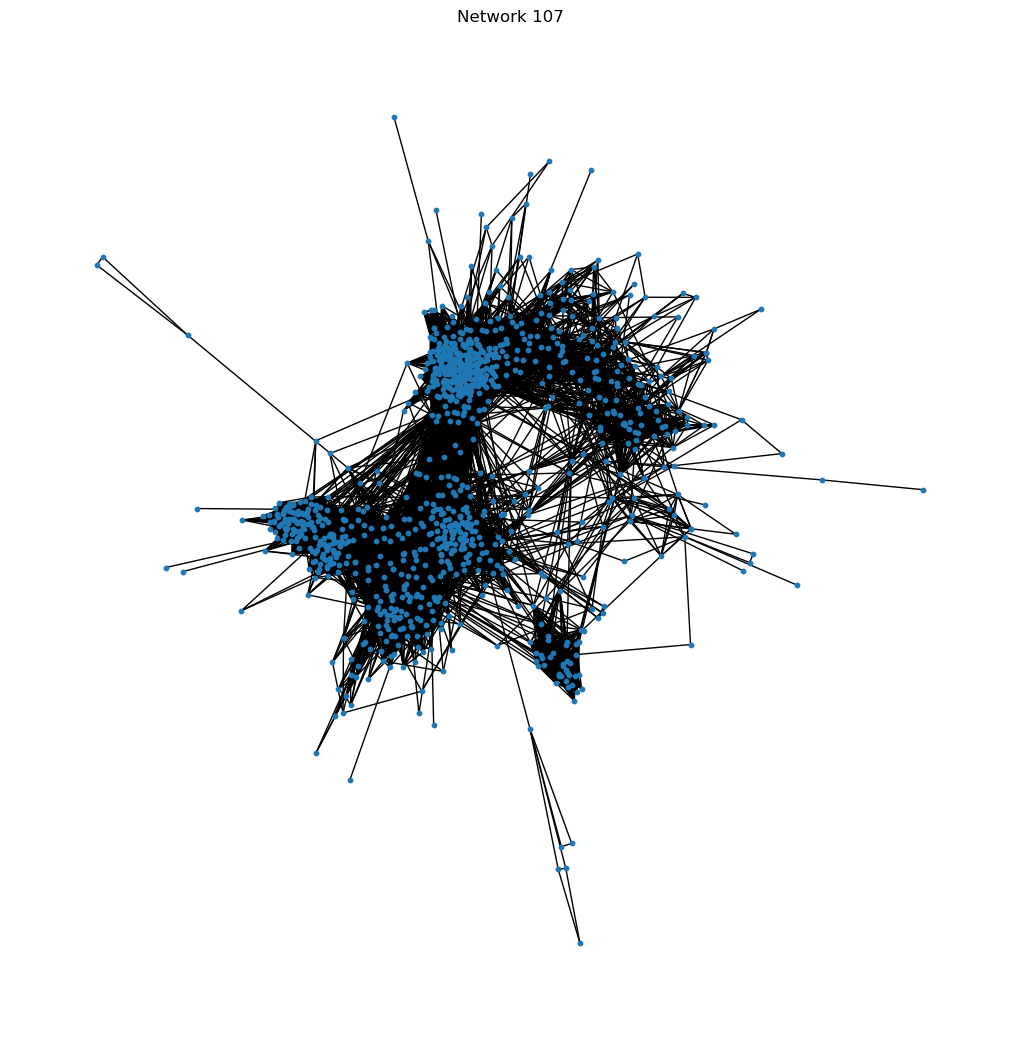

In [5]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Inline Plotting
%matplotlib inline

# Set the directory path where our data is stored
data_dir = 'data'
prefix = "107"  # Network to analyze

# Load the edges file and create the graph
edge_file = os.path.join(data_dir, f"{prefix}.edges")
G = nx.read_edgelist(edge_file, delimiter=' ', nodetype=int)

print(f"Graph for network {prefix} loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Visualization
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10)
plt.title(f"Network {prefix}")
plt.show()

In [3]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Basic metrics for analysis
print("Average Degree Centrality:", sum(degree_centrality.values()) / len(degree_centrality))
print("Average Betweenness Centrality:", sum(betweenness_centrality.values()) / len(betweenness_centrality))
print("Average Clustering Coefficient:", sum(clustering_coefficient.values()) / len(clustering_coefficient))

Average Degree Centrality: 0.0500860388607294
Average Betweenness Centrality: 0.0018911588489826285
Average Clustering Coefficient: 0.5264047980773338


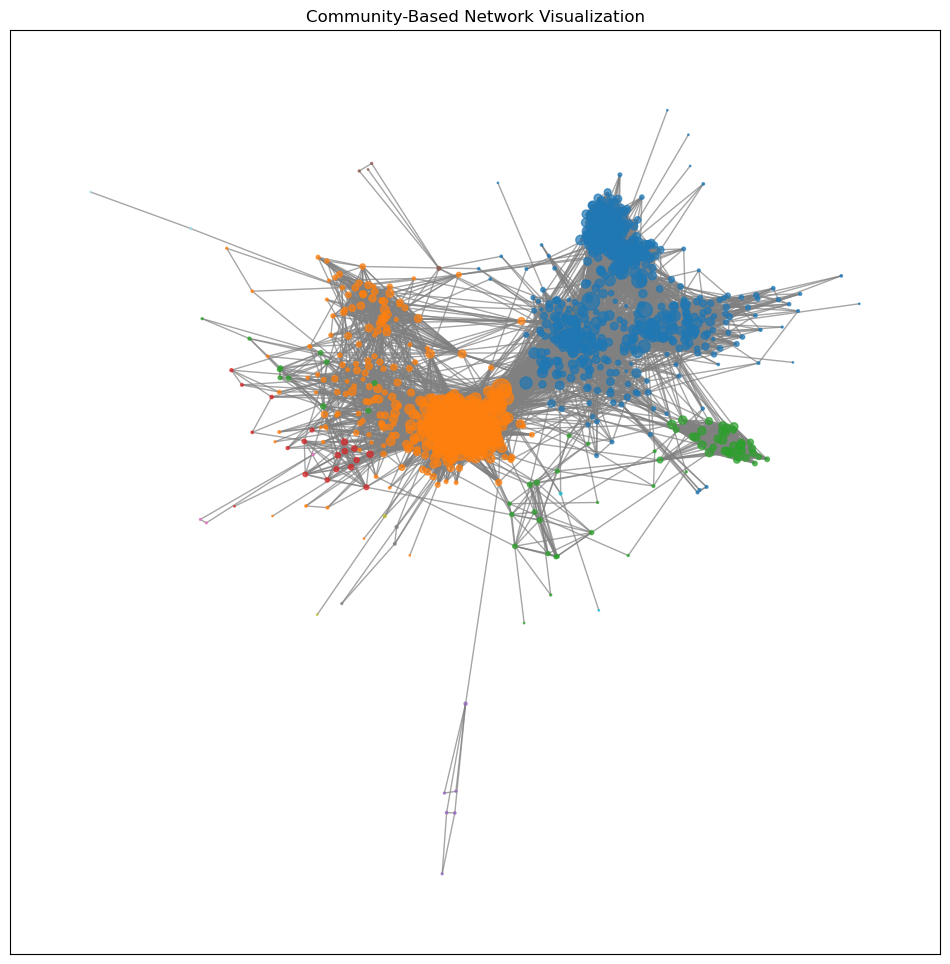

In [4]:
# Detecting communities
communities = greedy_modularity_communities(G)
community_map = {node: i for i, community in enumerate(communities) for node in community}

# Set node colors based on community
node_colors = [community_map[node] for node in G.nodes]
node_sizes = [nx.degree_centrality(G)[node] * 1000 for node in G]

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Using spring layout for better spacing
nx.draw_networkx(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.tab20,
    with_labels=False,
    edge_color="gray",
    alpha=0.7
)
plt.title("Community-Based Network Visualization")
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

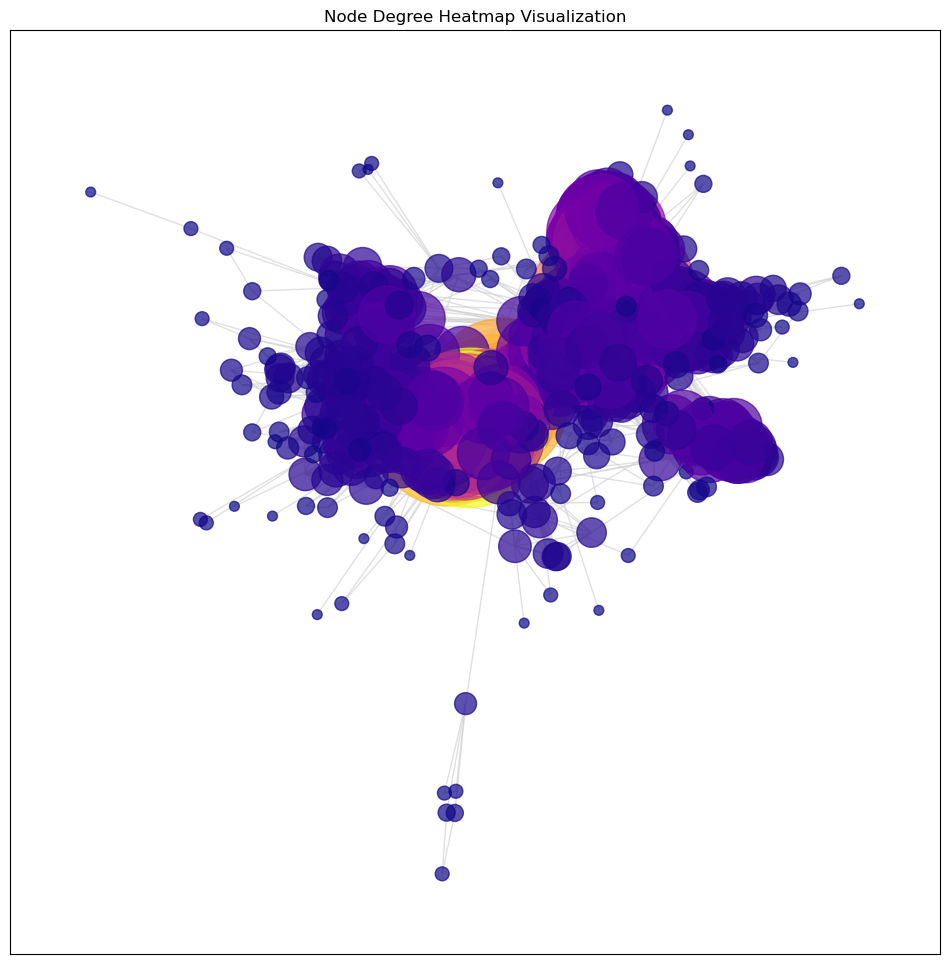

In [14]:
# Set node sizes and colors by degree
node_sizes = [nx.degree(G, node) * 50 for node in G]  # Adjust scaling factor
node_colors = [nx.degree(G, node) for node in G]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.plasma,  # Heatmap color scheme
    with_labels=False,
    edge_color="lightgray",
    alpha=0.7
)
plt.title("Node Degree Heatmap Visualization")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Degree")
plt.show()


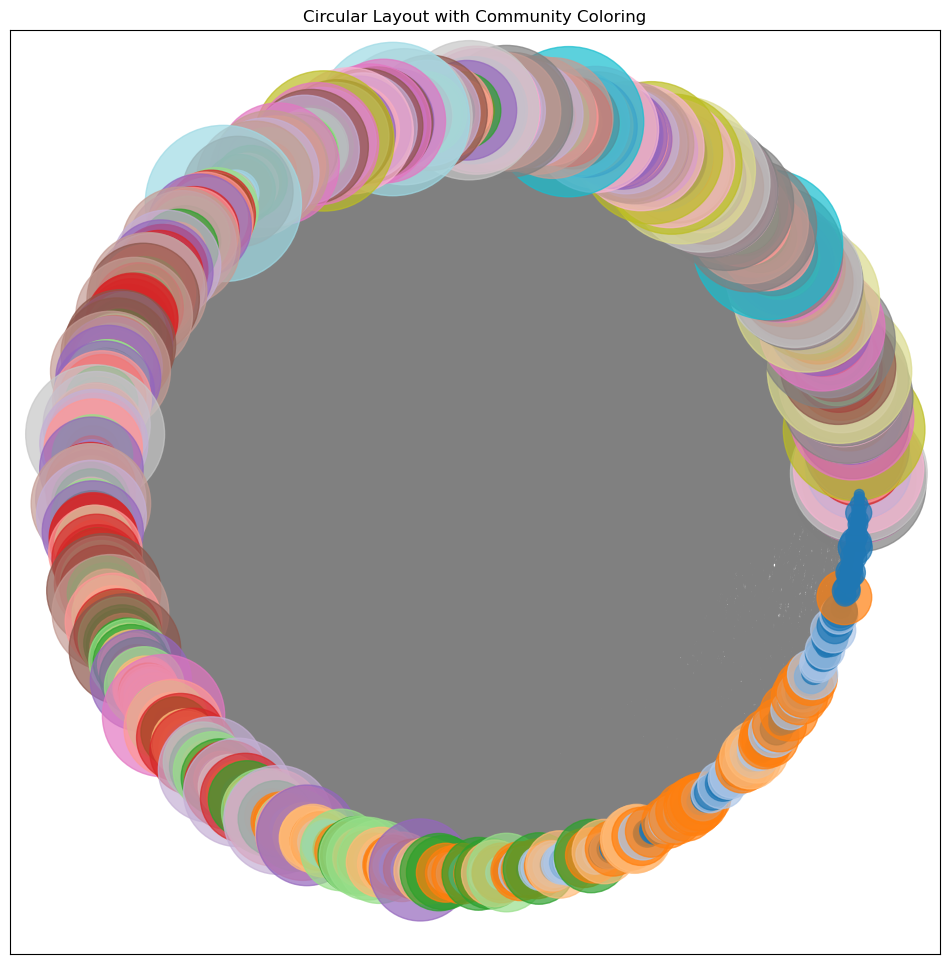

In [17]:
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G)
nx.draw_networkx(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.tab20,
    with_labels=False,
    edge_color="gray",
    alpha=0.7
)
plt.title("Circular Layout with Community Coloring")
plt.show()
